In [65]:
import numpy as np
import h5py

filename = "camera_intrinsics.h5"
filenameEx = "extrinsics.h5"
main_K, main_distortion = None, None
with h5py.File(filename, "r") as data:

    main_K = np.array(data["main"]["K"])
    main_distortion = np.array(data["main"]["distortion"])

#get the main camera extrinsics

with h5py.File(filenameEx,"r") as data:
    main_EX = np.array(data["main"])
dist_pickle = {}
k = main_K
dst = main_distortion
R_ex = np.zeros((3, 3))

for i in range(0,3):
    for k in range(0,3):
        R_ex[i][k] = main_EX[i][k]


[[-0.0745772   0.01507948  0.99710125  2.0568478 ]
 [-0.99657786  0.03461772 -0.07506159 -0.05882518]
 [-0.03564926 -0.99928683  0.01244618  1.4660132 ]
 [ 0.          0.          0.          1.        ]]


(-5.0, 5.0)

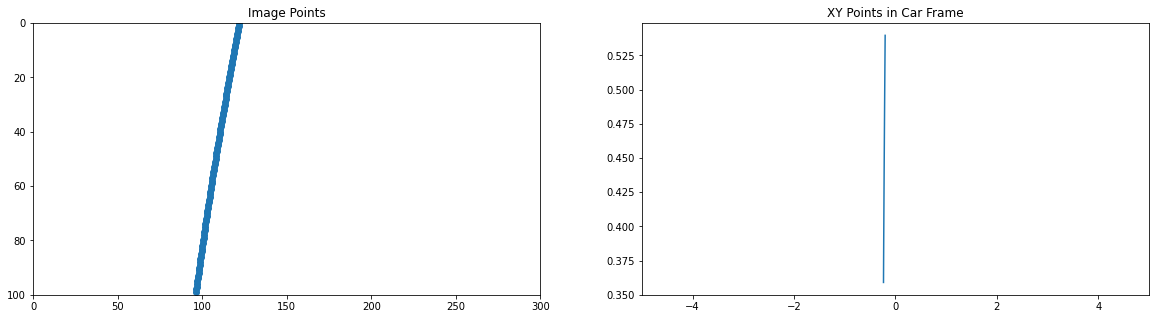

In [130]:
import matplotlib.pyplot as plt

def uvtoXYZ(u, v, main_k):
    image_vec = np.array([u, v, 1]).T # 2D points in image
    n = np.array([0, 1, 0]).T  #or is it [0,1,0]? .. normal vector in car/road frame
    cam_ex = main_EX # extrinsic matrix for main cam
    h = 1.4660132 # height of main cam (z tranlastion in extrinsic)
    
    n_c = np.matmul(R_ex, n) #normal vector in cam frame

    V = h/(np.matmul(n_c.T ,np.matmul(np.linalg.inv(main_K),image_vec.T)))

    pts_in_camera_frame = V * np.matmul(np.linalg.inv(main_K),image_vec)
    return pts_in_camera_frame



test_points = np.array([[x, 4.76e-4*x**2-3.06e-1*x + 1.22e2] for x in range(100)]) #diagonal line to center of image
y = np.array([uvtoXYZ(pt[0], pt[1], main_K) for pt in test_points])
out_points = np.array([np.matmul(np.linalg.inv(R_ex), pt) for pt in y])


fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(test_points[:, 1], test_points[:, 0], "o")
ax[0].set_xlim(0, 300)
ax[0].set_ylim(0, 100)
ax[0].set_title("Image Points")
ax[0].invert_yaxis()

ax[1].plot(out_points[:, 0], out_points[:, 2])
ax[1].set_title("XY Points in Car Frame")
ax[1].set_xlim(-5, 5)
# ax[1].set_ylim(0, max(out_points[:, 1]))